In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pywt

%matplotlib inline

In [2]:
SMALL_SIZE = 17
MEDIUM_SIZE = 18
BIGGER_SIZE = 19

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.texsystem": 'pdflatex',  # default is xetex
    }
)

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
mean_files = ["wavelet_jvla_means.npy", "wavelet_red_jvla_means.npy"]

In [5]:
std_files = ["wavelet_jvla_stds.npy", "wavelet_red_jvla_stds.npy"]

In [6]:
scenarios_means = np.load(mean_files[0])
scenarios_red_means = np.load(mean_files[1])

scenarios_stds = np.load(std_files[0])
scenarios_red_stds = np.load(std_files[1])

In [7]:
scenarios_means.shape

(3, 4, 5)

In [8]:
use_wavelet = ["haar", "coif", "db", "dmey", "sym"]
# use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
#idx_coif = [use_wavelet.index("coif") - 0.5, use_wavelet.index("db") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio") - 0.5, use_wavelet.index("sym") - 0.5]

In [9]:
# Getting minimum AICs wavelets
idx_sc1 = np.argmin(scenarios_means[0, 2])
idx_sc2 = np.argmin(scenarios_means[1, 2])
idx_sc3 = np.argmin(scenarios_means[2, 2])

In [10]:
# Getting minimum AICs wavelets + redundancy
idx_sc1_red = np.argmin(scenarios_red_means[0, 2])
idx_sc2_red = np.argmin(scenarios_red_means[1, 2])
idx_sc3_red = np.argmin(scenarios_red_means[2, 2])

In [11]:
delta_basis_means = np.load("deltaf_jvla_scenarios_means.npy")
delta_basis_stds = np.load("deltaf_jvla_scenarios_stds.npy")

In [12]:
delta_basis_means.shape

(3, 4)

In [13]:
print(
    "Scenario 1: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 2, idx_sc1], scenarios_stds[0, 2, idx_sc1]
    )
)

print(
    "Scenario 1: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 2, idx_sc1_red],
        scenarios_red_stds[0, 2, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 2], delta_basis_stds[0, 2]
    )
)

print(
    "Scenario 2: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 2, idx_sc2], scenarios_stds[1, 2, idx_sc2]
    )
)

print(
    "Scenario 2: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 2, idx_sc2_red],
        scenarios_red_stds[1, 2, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 2], delta_basis_stds[1, 2]
    )
)

print(
    "Scenario 3: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 2, idx_sc3], scenarios_stds[2, 2, idx_sc3]
    )
)

print(
    "Scenario 3: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 2, idx_sc3_red],
        scenarios_red_stds[2, 2, idx_sc3_red]
    )
)

print(
    "Scenario 3: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 2], delta_basis_stds[2, 2]
    )
)

Scenario 1: Best AIC Wavelet family dmey : -19850.06 \pm 164.96
Scenario 1: Best AIC Wavelet+Redundancy family dmey : -20239.14 \pm 64.95
Scenario 1: Best AIC Delta function family : -20253.98 \pm 69.52

Scenario 2: Best AIC Wavelet family haar : -20095.70 \pm 80.98
Scenario 2: Best AIC Wavelet+Redundancy family haar : -20117.08 \pm 73.14
Scenario 2: Best AIC Delta function family : -20222.38 \pm 57.24

Scenario 3: Best AIC Wavelet family sym : -19716.32 \pm 179.49
Scenario 3: Best AIC Wavelet+Redundancy family db : -19991.83 \pm 118.40
Scenario 3: Best AIC Delta function family : -20168.45 \pm 75.03



In [14]:
print(
    "Scenario 1: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 3, idx_sc1], scenarios_stds[0, 3, idx_sc1]
    )
)

print(
    "Scenario 1: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 3, idx_sc1_red],
        scenarios_red_stds[0, 3, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 3], delta_basis_stds[0, 3]
    )
)

print(
    "Scenario 2: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 3, idx_sc2], scenarios_stds[1, 3, idx_sc2]
    )
)

print(
    "Scenario 2: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 3, idx_sc2_red],
        scenarios_red_stds[1, 3, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 3], delta_basis_stds[1, 3]
    )
)

print(
    "Scenario 3: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 3, idx_sc3], scenarios_stds[2, 3, idx_sc3]
    )
)

print(
    "Scenario 3: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 3, idx_sc3_red],
        scenarios_red_stds[2, 3, idx_sc3_red]
    )
)

print(
    "Scenario 2: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 3], delta_basis_stds[2, 3]
    )
)

Scenario 1: Best BIC Wavelet family dmey : -19586.48 \pm 198.42
Scenario 1: Best BIC Wavelet+Redundancy family dmey : -20187.33 \pm 66.00
Scenario 1: Best BIC Delta function family : -20132.21 \pm 180.03

Scenario 2: Best BIC Wavelet family haar : -19978.54 \pm 101.27
Scenario 2: Best BIC Wavelet+Redundancy family haar : -19969.61 \pm 92.54
Scenario 2: Best BIC Delta function family : -20026.45 \pm 99.45

Scenario 3: Best BIC Wavelet family sym : -19437.46 \pm 205.94
Scenario 3: Best BIC Wavelet+Redundancy family db : -19767.65 \pm 150.11
Scenario 2: Best BIC Delta function family : -19924.48 \pm 166.13



In [15]:
print(
    "Scenario 1: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 0, idx_sc1], scenarios_stds[0, 0, idx_sc1]
    )
)

print(
    "Scenario 1: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 0, idx_sc1_red],
        scenarios_red_stds[0, 0, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 0], delta_basis_stds[0, 0]
    )
)

print(
    "Scenario 2: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 0, idx_sc2], scenarios_stds[1, 0, idx_sc2]
    )
)

print(
    "Scenario 2: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 0, idx_sc2_red],
        scenarios_red_stds[1, 0, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 0], delta_basis_stds[1, 0]
    )
)

print(
    "Scenario 3: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 0, idx_sc3], scenarios_stds[2, 0, idx_sc3]
    )
)

print(
    "Scenario 3: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 0, idx_sc3_red],
        scenarios_red_stds[2, 0, idx_sc3_red]
    )
)

print(
    "Scenario 3: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 0], delta_basis_stds[2, 0]
    )
)

Scenario 1: Best PSNR Wavelet family dmey : 102.34 \pm 9.58
Scenario 1: Best PSNR Wavelet+Redundancy family dmey : 126.03 \pm 5.81
Scenario 1: Best PSNR Delta function family : 126.17 \pm 5.55

Scenario 2: Best PSNR Wavelet family haar : 49.26 \pm 6.66
Scenario 2: Best PSNR Wavelet+Redundancy family haar : 50.27 \pm 6.53
Scenario 2: Best PSNR Delta function family : 54.11 \pm 2.77

Scenario 3: Best PSNR Wavelet family sym : 100.18 \pm 10.51
Scenario 3: Best PSNR Wavelet+Redundancy family db : 117.39 \pm 7.23
Scenario 3: Best PSNR Delta function family : 124.87 \pm 6.30



In [16]:
print(
    "Scenario 1: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 1, idx_sc1] * 10**5,
        scenarios_stds[0, 1, idx_sc1] * 10**5
    )
)

print(
    "Scenario 1: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 1, idx_sc1_red] * 10**5,
        scenarios_red_stds[0, 1, idx_sc1_red] * 10**5
    )
)

print(
    "Scenario 1: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 1] * 10**5, delta_basis_stds[0, 1] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 1, idx_sc2] * 10**5,
        scenarios_stds[1, 1, idx_sc2] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 1, idx_sc2_red] * 10**5,
        scenarios_red_stds[1, 1, idx_sc2_red] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 1] * 10**5, delta_basis_stds[1, 1] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 1, idx_sc3] * 10**5,
        scenarios_stds[2, 1, idx_sc3] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 1, idx_sc3_red] * 10**5,
        scenarios_red_stds[2, 1, idx_sc3_red] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 1] * 10**5, delta_basis_stds[2, 1] * 10**5
    )
)

Scenario 1: Best RMSE Wavelet family dmey : 80.58 \pm 4.56
Scenario 1: Best RMSE Wavelet+Redundancy family dmey : 72.09 \pm 1.68
Scenario 1: Best RMSE Delta function family : 71.02 \pm 1.36

Scenario 2: Best RMSE Wavelet family haar : 75.21 \pm 2.05
Scenario 2: Best RMSE Wavelet+Redundancy family haar : 74.33 \pm 1.81
Scenario 2: Best RMSE Delta function family : 71.10 \pm 1.41

Scenario 3: Best RMSE Wavelet family sym : 84.37 \pm 5.21
Scenario 3: Best RMSE Wavelet+Redundancy family db : 76.95 \pm 3.08
Scenario 3: Best RMSE Delta function family : 72.02 \pm 1.81



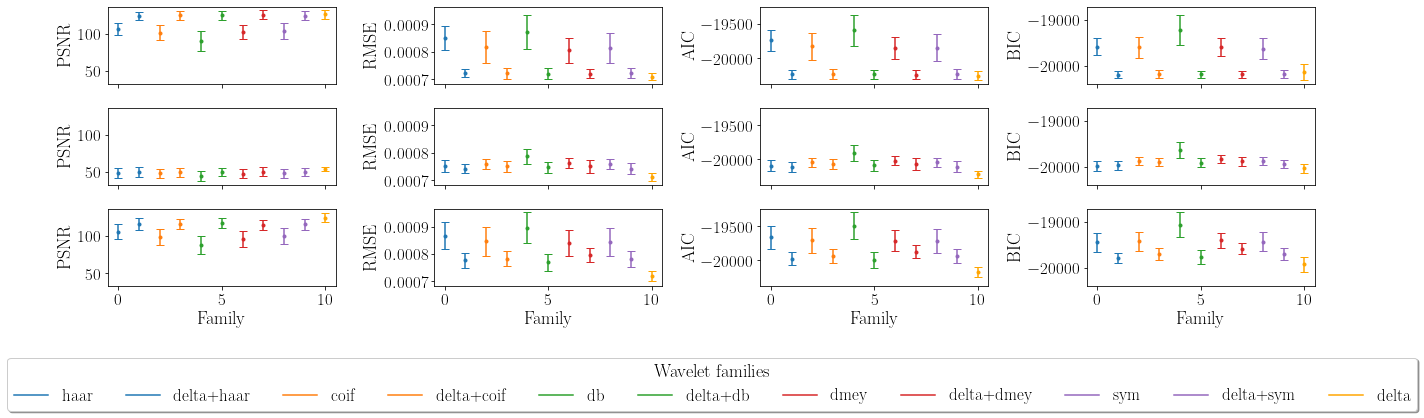

In [17]:
_id = np.arange(0, 2 * nwavelets, 2)
names = ["PSNR", "RMSE", "AIC", "BIC"]
fig, ax = plt.subplots(
    nrows=scenarios_means.shape[0], ncols=len(names), sharey='col', sharex='all', figsize=(18, 5)
)
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, 2 * nwavelets)]

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i, j].plot(_id[k], scenarios_means[i, j, k], label=use_wavelet[k], color=colors[k])
            ax[i, j].plot(
                _id[k] + 1,
                scenarios_red_means[i, j, k],
                label="delta+" + use_wavelet[k],
                color=colors[k]
            )
            ax[i, j].errorbar(
                _id[k],
                scenarios_means[i, j, k],
                yerr=scenarios_stds[i, j, k],
                fmt='.',
                capsize=4,
                color=colors[k]
            )
            ax[i, j].errorbar(
                _id[k] + 1,
                scenarios_red_means[i, j, k],
                yerr=scenarios_red_stds[i, j, k],
                fmt='.',
                capsize=4,
                color=colors[k]
            )
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i, j].set_ylabel(names[j])
        if i == 2:
            ax[i, j].set_xlabel("Family")
        ax[i, j].plot(_id[-1] + 1, delta_basis_means[i, j], label="delta", color="orange")
        ax[i, j].errorbar(
            _id[-1] + 2,
            delta_basis_means[i, j],
            yerr=delta_basis_stds[i, j],
            fmt='.',
            capsize=4,
            color="orange"
        )

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)

#for i in range(scenarios_means.shape[0]):
#ax[i,1].set_ylim([0,0.0015])
#ax[i,2].set_ylim([-25000,-20000])
#ax[i,3].set_ylim([-25000,-20000])

#ax[i,2].set_ylim([-25000,-15000]) #undecimated
#ax[i,3].set_ylim([-25000,17500]) #undecimated
undecimated = ""
ofile_name = "families" + undecimated + "_wavelets_jvla.pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0, 0].get_legend_handles_labels()
legend = fig.legend(
    h,
    l,
    loc='lower center',
    ncol=18,
    fancybox=True,
    bbox_to_anchor=[0.52, -0.2],
    shadow=True,
    title="Wavelet families"
)
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)  # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')  #